In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.display import display
from scipy import stats
from sklearn.model_selection import train_test_split

%matplotlib inline 
np.random.seed(42)

### Loading From Instructors data set
- 1000 columns
- 4000 total observations

In [2]:
df = pd.read_pickle('instructors_madelon.p',)

In [3]:
df.head()

,_id,feat_000,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,...,feat_991,feat_992,feat_993,feat_994,feat_995,feat_996,feat_997,feat_998,feat_999,target
0,80458,0.010505,0.630850,1.249723,1.700374,1.205162,-2.085407,-0.611156,0.370799,0.397818,...,-0.086933,-0.353173,0.635960,-1.047383,-0.346814,1.336496,-0.647843,-0.095200,1.204304,1
1,7596,-1.586881,-1.929140,-1.177056,1.286060,0.103537,-0.392550,0.292773,0.052972,-0.779289,...,-0.120499,1.245448,-0.392505,-0.566928,0.486139,-1.154934,-0.957800,-1.152834,1.000196,0
2,165348,-0.959330,-0.209214,0.314570,0.905692,0.309640,-0.750020,-0.123423,-0.339432,-0.011791,...,0.957690,0.700475,0.695733,-0.062949,-1.365033,-0.875845,0.101062,0.605410,-0.586618,0
3,81023,-1.107656,-1.197624,-1.557763,-0.313985,-1.058517,-1.660646,0.863125,0.413333,-0.270331,...,0.059547,-0.154521,0.237945,0.160256,-0.362392,-0.541219,0.155477,0.992323,0.627057,0
4,63738,-2.386392,-0.524623,1.946774,1.631185,1.016927,1.830281,0.581741,0.017842,2.209407,...,0.785197,-2.551204,-0.339143,0.073261,0.933046,0.044197,0.167044,0.772084,0.847487,0


In [4]:
df = df.set_index('_id')

In [5]:
df.head()

,feat_000,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_991,feat_992,feat_993,feat_994,feat_995,feat_996,feat_997,feat_998,feat_999,target
_id,,,,,,,,,,,,,,,,,,,,,
80458,0.010505,0.630850,1.249723,1.700374,1.205162,-2.085407,-0.611156,0.370799,0.397818,-0.643030,...,-0.086933,-0.353173,0.635960,-1.047383,-0.346814,1.336496,-0.647843,-0.095200,1.204304,1
7596,-1.586881,-1.929140,-1.177056,1.286060,0.103537,-0.392550,0.292773,0.052972,-0.779289,-2.577023,...,-0.120499,1.245448,-0.392505,-0.566928,0.486139,-1.154934,-0.957800,-1.152834,1.000196,0
165348,-0.959330,-0.209214,0.314570,0.905692,0.309640,-0.750020,-0.123423,-0.339432,-0.011791,1.433953,...,0.957690,0.700475,0.695733,-0.062949,-1.365033,-0.875845,0.101062,0.605410,-0.586618,0
81023,-1.107656,-1.197624,-1.557763,-0.313985,-1.058517,-1.660646,0.863125,0.413333,-0.270331,0.943614,...,0.059547,-0.154521,0.237945,0.160256,-0.362392,-0.541219,0.155477,0.992323,0.627057,0
63738,-2.386392,-0.524623,1.946774,1.631185,1.016927,1.830281,0.581741,0.017842,2.209407,-0.267181,...,0.785197,-2.551204,-0.339143,0.073261,0.933046,0.044197,0.167044,0.772084,0.847487,0


In [6]:
df = df.reset_index(drop = True)

In [7]:
df.head()

,feat_000,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_991,feat_992,feat_993,feat_994,feat_995,feat_996,feat_997,feat_998,feat_999,target
0,0.010505,0.630850,1.249723,1.700374,1.205162,-2.085407,-0.611156,0.370799,0.397818,-0.643030,...,-0.086933,-0.353173,0.635960,-1.047383,-0.346814,1.336496,-0.647843,-0.095200,1.204304,1
1,-1.586881,-1.929140,-1.177056,1.286060,0.103537,-0.392550,0.292773,0.052972,-0.779289,-2.577023,...,-0.120499,1.245448,-0.392505,-0.566928,0.486139,-1.154934,-0.957800,-1.152834,1.000196,0
2,-0.959330,-0.209214,0.314570,0.905692,0.309640,-0.750020,-0.123423,-0.339432,-0.011791,1.433953,...,0.957690,0.700475,0.695733,-0.062949,-1.365033,-0.875845,0.101062,0.605410,-0.586618,0
3,-1.107656,-1.197624,-1.557763,-0.313985,-1.058517,-1.660646,0.863125,0.413333,-0.270331,0.943614,...,0.059547,-0.154521,0.237945,0.160256,-0.362392,-0.541219,0.155477,0.992323,0.627057,0
4,-2.386392,-0.524623,1.946774,1.631185,1.016927,1.830281,0.581741,0.017842,2.209407,-0.267181,...,0.785197,-2.551204,-0.339143,0.073261,0.933046,0.044197,0.167044,0.772084,0.847487,0


In [8]:
df.columns = [list(range(0,1001))]

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,0.010505,0.630850,1.249723,1.700374,1.205162,-2.085407,-0.611156,0.370799,0.397818,-0.643030,...,-0.086933,-0.353173,0.635960,-1.047383,-0.346814,1.336496,-0.647843,-0.095200,1.204304,1
1,-1.586881,-1.929140,-1.177056,1.286060,0.103537,-0.392550,0.292773,0.052972,-0.779289,-2.577023,...,-0.120499,1.245448,-0.392505,-0.566928,0.486139,-1.154934,-0.957800,-1.152834,1.000196,0
2,-0.959330,-0.209214,0.314570,0.905692,0.309640,-0.750020,-0.123423,-0.339432,-0.011791,1.433953,...,0.957690,0.700475,0.695733,-0.062949,-1.365033,-0.875845,0.101062,0.605410,-0.586618,0
3,-1.107656,-1.197624,-1.557763,-0.313985,-1.058517,-1.660646,0.863125,0.413333,-0.270331,0.943614,...,0.059547,-0.154521,0.237945,0.160256,-0.362392,-0.541219,0.155477,0.992323,0.627057,0
4,-2.386392,-0.524623,1.946774,1.631185,1.016927,1.830281,0.581741,0.017842,2.209407,-0.267181,...,0.785197,-2.551204,-0.339143,0.073261,0.933046,0.044197,0.167044,0.772084,0.847487,0


### Sampling
- Sample = 1500, Population = 4000
- 95% CI
- 2% margin of error


In [10]:
df1 = df.sample(n = 1500, random_state=42)

In [11]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
555,0.526328,-0.087152,0.069555,0.098947,0.553192,-0.915599,1.257155,0.077252,1.128888,-0.084065,...,-0.102369,0.363259,1.261132,-0.591652,0.192462,0.687663,-0.278748,0.664907,-0.826826,1
3491,-0.692228,1.701339,-0.637670,1.187102,-0.232241,-0.921976,0.238363,0.733594,-1.936643,-0.989541,...,-2.631121,0.101154,-0.647571,-1.061382,0.113863,-0.261625,0.406165,0.662426,0.795164,0
527,-1.767299,1.336717,-0.747920,-1.091688,1.057425,0.658679,-0.366263,-0.569391,-0.659966,-0.220220,...,-0.583225,1.232544,0.036943,0.036902,-1.396891,0.687325,0.824276,-0.059393,0.956310,0
3925,-0.289733,-0.730629,-0.229298,0.284833,-0.152662,-0.319211,-0.330152,0.167844,1.234030,1.835589,...,-0.788024,-1.613273,-0.303314,-1.236033,-0.356922,-1.190595,-0.102052,0.105519,-0.083279,0
2989,-0.981737,-1.072351,1.644704,-0.026942,2.292539,-0.080966,-1.927684,-0.160240,0.790301,0.213753,...,-0.026161,0.273424,0.392888,-1.095072,-1.780190,-1.090004,-0.163052,0.101780,0.590714,1


### Basic EDA
- not really a whole lot we can do, just familiarize ourselves with the data a little more

In [12]:
df[1000].value_counts()

1    2030
0    1970
Name: 1000, dtype: int64

### Getting rid of noisy features
- Ideally we will reduce from our 500 features to a much more reasonable number
- Josh's method "leave one out regressor" and compare the $R^{2}$ (not so sure about this)
- We'll also try f_classif

### f_classif Method

In [13]:
from sklearn.feature_selection import f_classif, SelectKBest

In [14]:
X = df.drop(1000, axis = 1)
y = df[1000]

In [15]:
f, pvals = f_classif(X,y)

In [16]:
col_and_pvals = list(zip(pvals, X.columns))

In [17]:
col_and_pvals = pd.DataFrame(col_and_pvals)

In [18]:
important_features = col_and_pvals[col_and_pvals[0] < .005]

In [19]:
len(important_features)

23

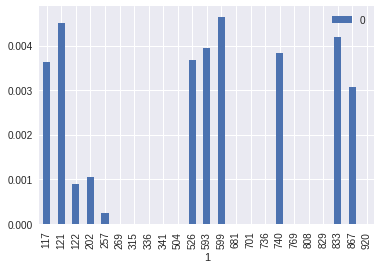

In [20]:
important_features.plot.bar(x = 1, y = 0)

In [21]:
important = important_features.index

In [22]:
important

Int64Index([117, 121, 122, 202, 257, 269, 315, 336, 341, 504, 526, 593, 599,
            681, 701, 736, 740, 769, 808, 829, 833, 867, 920],
           dtype='int64')

### This process gave us 23 possible important features
- 117, 121, 122, 202, 257, 269, 315, 336, 341, 504, 526, 593, 599, 681, 701, 736, 740, 769, 808, 829, 833, 867, 920

### Leave one out regression and compare $R^{2}$

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [24]:
df1 = df.sample(n = 600, random_state=42)

In [25]:
def calculate_r_2_for_feature(data, feature, model):
    new_data = data.drop(feature, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(new_data,data[feature],test_size=0.25, random_state = 42)

    scaler = StandardScaler()
    scaler.fit(X_train, y_train)
    X_tr_sc = scaler.transform(X_train, y_train)
    X_ts_sc = scaler.transform(X_test, y_test)
    
    regressor = model()
    regressor.fit(X_train, y_train)

    score = regressor.score(X_test, y_test)
    return score

In [26]:
knr_scores = []

for i in range(df1.shape[1] - 1):
    #print(i)
    knr_scores.append(calculate_r_2_for_feature(df1.drop(1000, axis = 1), df1.columns[i], KNeighborsRegressor))

In [27]:
feature_score = list(zip(df1.columns, knr_scores))

In [28]:
s_df = pd.DataFrame(feature_score)

In [29]:
decent_features = s_df[s_df[1] > .05]

In [30]:
decent_features.shape

(20, 2)

In [31]:
decent_features = decent_features.drop(0, axis = 1)

In [32]:
decent_features = decent_features.sort_values(by = 1)

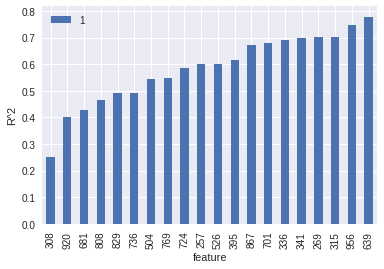

In [33]:
decent_features.plot.bar(x = decent_features.index, y = 1)
plt.ylabel('R^2')
plt.xlabel('feature')

In [34]:
decent = decent_features.index #20 decent features

In [35]:
decent

Int64Index([257, 269, 308, 315, 336, 341, 395, 504, 526, 639, 681, 701, 724,
            736, 769, 808, 829, 867, 920, 956],
           dtype='int64')

### This process gave us 20 important features
- 257, 269, 308, 315, 336, 341, 395, 504, 526, 639, 681, 701, 724, 736, 769, 808, 829, 867, 920, 956
### Compare to f_classif process
- 117, 121, 122, 202, 257, 269, 315, 336, 341, 504, 526, 593, 599, 681, 701, 736, 740, 769, 808, 829, 833, 867, 920

### Similar results 
- We'll still move forward with Josh's method